# Directed Search: Scenario discovery & trade-off analysis

Scenario discovery and trade-off analysis are used to detect the vulnerabilities of candidate solutions. Patient Rule Induction Method (PRIM) is used to identify policy vulnerabilities. For this analysis the results of the uncertainty analysis model simulation is used. In this simulation, the 9 policies of interest are evaluated under 5000 scenarios.



In [3]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
from ema_workbench import MultiprocessingEvaluator, ema_logging
from ema_workbench import Samplers
from ema_workbench.em_framework import get_SALib_problem
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt


In [4]:
from SALib.analyze.sobol import analyze

### Importing results

In [5]:
experiments = pd.read_csv('data/output_data/experiments_uncertainty_simulation_5000s.csv')
outcomes = pd.read_csv('data/output_data/outcomes_uncertainty_simulation_5000s.csv')

# 2.? Scenario discovery

## 2.? PRIM

Below scenario discovery has been applied again, just like 1.2.2, using PRIM. It is chosen to focus at the 10% worst outcomes for both the number of expected deaths and the expected annual damage. This means that only 10% of all scenarios with either the highest number of expected deaths or the highest expected annual damage are included.

The PRIM algorithm was used with the default value for the peeling alfa and a value of 0.8 as threshold. 0.8 was chosen after conducting a small sensitivity analysis, which showed that the use of another threshold did not lead to significantly different results


Wel nog iets toevoegen over keuze van box!!
### 2....? Expected Number of Deaths

In [ ]:
# Find uncertainty_experiments
# A list has been created of uncertainties in the model
list_of_uncertainties = ['discount rate 0','discount rate 1','discount rate 2',\
'A.0_ID flood wave shape',
'A.1_Bmax','A.1_pfail','A.1_Brate',\
'A.2_Bmax','A.2_pfail','A.2_Brate',\
'A.3_Bmax','A.3_pfail','A.3_Brate',\
'A.4_Bmax','A.4_pfail','A.4_Brate',\
'A.5_Bmax','A.5_pfail','A.5_Brate',]

#experiments onbekend is nog niet duidelijk welke dataset hier gebruikt wordt.
uncertainty_experiments = experiments_onbekend.loc[:,list_of_uncertainties]
uncertainty_experiments

In [ ]:
# Juiste outcomes definieren

In [ ]:
# applying PRIM to the 10% worst outcomes for the expected number of deaths (highest number of deaths)
x = uncertainty_experiments
y = ['Expected Number of Deaths'] > np.percentile(outcomes['Expected Number of Deaths'],90) #

prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

In [ ]:
box1.inspect(?)
box1.inspect(?, style="graph")
box1.show_pairs_scatter(?)
plt.show()

### 2....? Expected Annual Damage

In [ ]:
x = uncertainty_experiments
y = outcomes['Expected Annual Damage'] > np.percentile(outcomes['Expected Annual Damage'],90) #

prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

#box1.show_tradeoff(annotated=True) # Deze is puut voor visualiseren en weten welk nummer op de grens zit
box1.show_tradeoff()
plt.show()

In [ ]:
box1.inspect(?)
box1.inspect(?, style="graph")
box1.show_pairs_scatter(?)
plt.show()

# 2.? Trade-off

parcoords.plot() is where each line represents an experiment and the color represents whether it is selected or not. This plot visualizes the trade-offs between different objectives or outcome values.

In [ ]:
import matplotlib.pyplot as plt
from ema_workbench.analysis import parcoords

# Obtain the selected box from PRIM analysis
selected_box = box1

# Perform the trade-off analysis using selected box
data = experiments.loc[selected_box.yi]
data['Selected'] = selected_box.yi

# Visualize the trade-offs using parallel coordinates plot
fig, axes = plt.subplots(figsize=(10, 6))
parcoords.plot(data, ax=axes, color='Selected', colormap='Set1')

# Customize the plot
plt.title('Trade-off Analysis')
plt.xticks(rotation=45)
plt.xlabel('Objectives')
plt.ylabel('Outcome Values')
plt.legend(loc='upper right')

# Show the plot
plt.show()

## SOBOL?

In [27]:
dike_model, planning_steps = get_model_for_problem_formulation(2)

In [28]:
problem = get_SALib_problem(dike_model.uncertainties)
problem

{'num_vars': 19,
 'names': ['A.0_ID flood wave shape',
  'A.1_Bmax',
  'A.1_Brate',
  'A.1_pfail',
  'A.2_Bmax',
  'A.2_Brate',
  'A.2_pfail',
  'A.3_Bmax',
  'A.3_Brate',
  'A.3_pfail',
  'A.4_Bmax',
  'A.4_Brate',
  'A.4_pfail',
  'A.5_Bmax',
  'A.5_Brate',
  'A.5_pfail',
  'discount rate 0',
  'discount rate 1',
  'discount rate 2'],
 'bounds': [(0, 133),
  (30, 350),
  (0, 3),
  (0, 1),
  (30, 350),
  (0, 3),
  (0, 1),
  (30, 350),
  (0, 3),
  (0, 1),
  (30, 350),
  (0, 3),
  (0, 1),
  (30, 350),
  (0, 3),
  (0, 1),
  (0, 4),
  (0, 4),
  (0, 4)]}

In [29]:
experiments = pd.read_csv('data/output_data/experiments_scenario_discovery_10s_sobol.csv', index_col=None) #OMZETTEN NAAR 20.000
print(f"Shape of data: {experiments.shape[0]} rows, {experiments.shape[1]} columns.")
experiments.head(10)

Shape of data: 3600 rows, 54 columns.


,Unnamed: 0,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,0,34,82.144825,1.0,0.185025,36.183953,1.5,0.575771,308.202626,1.5,...,1,5,1,2,7,0,0,0,0,dikesnet
1,1,101,82.144825,1.0,0.185025,36.183953,1.5,0.575771,308.202626,1.5,...,1,5,1,2,7,0,0,1,0,dikesnet
2,2,34,230.780348,1.0,0.185025,36.183953,1.5,0.575771,308.202626,1.5,...,1,5,1,2,7,0,0,2,0,dikesnet
3,3,34,82.144825,10.0,0.185025,36.183953,1.5,0.575771,308.202626,1.5,...,1,5,1,2,7,0,0,3,0,dikesnet
4,4,34,82.144825,1.0,0.708126,36.183953,1.5,0.575771,308.202626,1.5,...,1,5,1,2,7,0,0,4,0,dikesnet
5,5,34,82.144825,1.0,0.185025,138.086776,1.5,0.575771,308.202626,1.5,...,1,5,1,2,7,0,0,5,0,dikesnet
6,6,34,82.144825,1.0,0.185025,36.183953,1.5,0.575771,308.202626,1.5,...,1,5,1,2,7,0,0,6,0,dikesnet
7,7,34,82.144825,1.0,0.185025,36.183953,1.5,0.873721,308.202626,1.5,...,1,5,1,2,7,0,0,7,0,dikesnet
8,8,34,82.144825,1.0,0.185025,36.183953,1.5,0.575771,138.025520,1.5,...,1,5,1,2,7,0,0,8,0,dikesnet
9,9,34,82.144825,1.0,0.185025,36.183953,1.5,0.575771,308.202626,10.0,...,1,5,1,2,7,0,0,9,0,dikesnet


In [30]:
results = pd.read_csv('data/output_data/results_scenario_discovery_10s_sobol.csv', index_col=None) #OMZETTEN NAAR 20.000
print(f"Shape of data: {results.shape[0]} rows, {results.shape[1]} columns.")
results.head(10)

Shape of data: 3600 rows, 6 columns.


,Unnamed: 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,0,9.804904e+07,2.272627e+08,30700000.0,1624.073114,0.008354
1,1,9.662522e+07,2.272627e+08,30700000.0,1568.221124,0.008212
2,2,9.804904e+07,2.272627e+08,30700000.0,1624.073114,0.008354
3,3,9.804904e+07,2.272627e+08,30700000.0,1624.073114,0.008354
4,4,0.000000e+00,2.272627e+08,30700000.0,0.000000,0.000000
5,5,9.804904e+07,2.272627e+08,30700000.0,1624.073114,0.008354
6,6,9.804904e+07,2.272627e+08,30700000.0,1624.073114,0.008354
7,7,9.804904e+07,2.272627e+08,30700000.0,1624.073114,0.008354
8,8,9.804904e+07,2.272627e+08,30700000.0,1624.073114,0.008354
9,9,9.804904e+07,2.272627e+08,30700000.0,1624.073114,0.008354


In [31]:
results['Expected Annual Damage'].shape

(3600,)

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

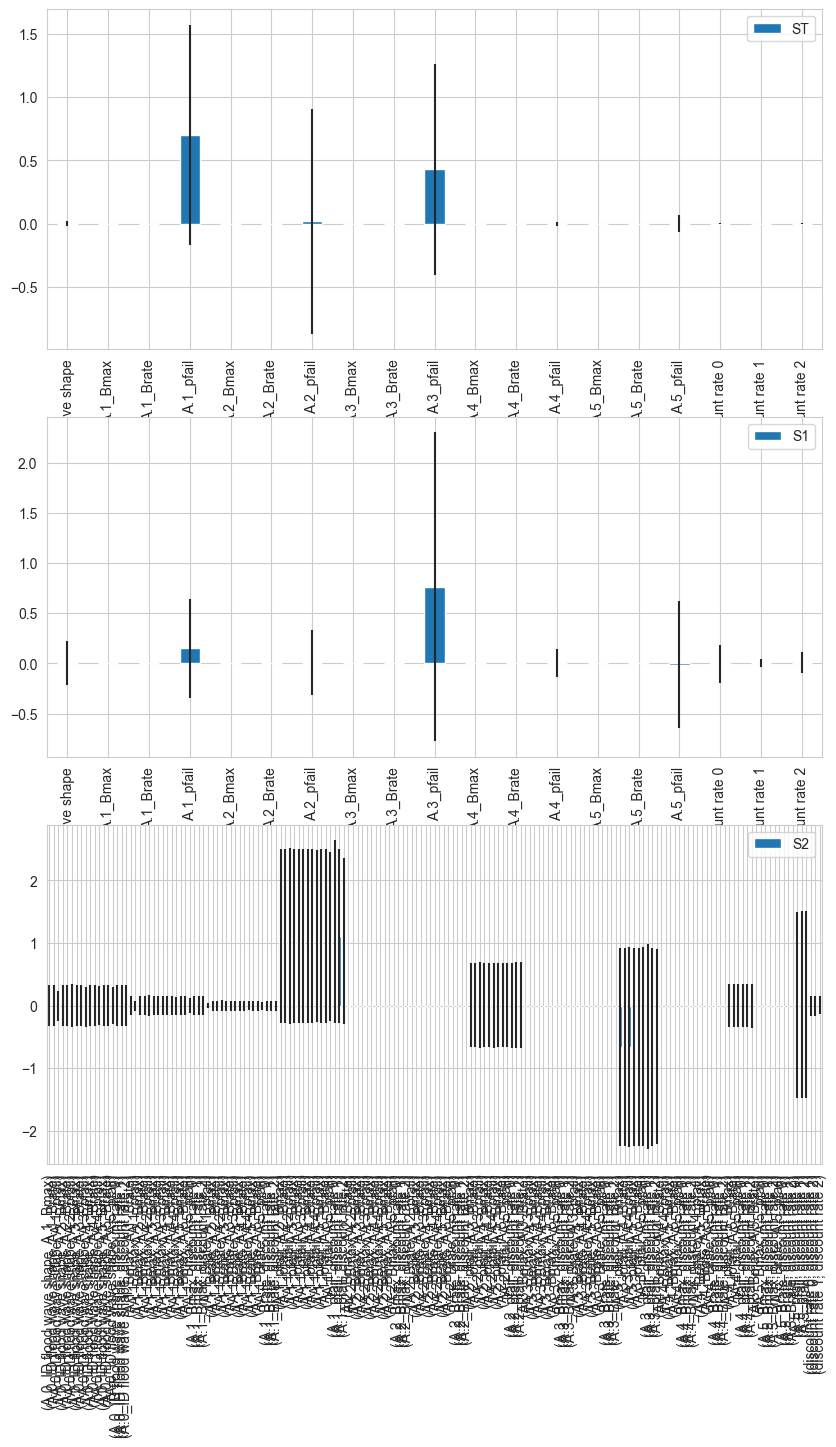

In [40]:
sobol_results = {}

for policy in experiments.policy.unique():
    logical = experiments.policy == policy
    y = results.loc[logical,'Expected Annual Damage'].values
    indices = analyze(problem, y)
    sobol_results[policy] = indices

fig, axes = plt.subplots(3,1)
fig.set_size_inches(10, 15)
indices.plot(ax=axes)

The Sobol method is a global sensitivity analysis technique that allows you to assess the relative importance of
input variables (uncertainties) in influencing the output of a model. While you have already selected 9 policies
of interest, the Sobol' analysis can provide valuable insights into the uncertainty and variability associated
with these policies.

Here's why the uncertainty analysis using the Sobol method can still be useful:

## Identifying influential factors:
The Sobol' method quantifies the contribution of each input variable to the output variability. By assessing the sensitivity indices, you can identify which input variables have the most significant impact on the output. This information can help you focus your efforts on the most influential factors and prioritize them in your decision-making process.
### A1_pfail, A2_pfail and A3_pfail are influential factors
## Ranking policies:
While you have selected 9 policies, the Sobol' analysis can help rank these policies based on their performance under different input conditions. It provides insights into how sensitive each policy is to changes in the input variables. By understanding the relative performance and robustness of the policies across different scenarios, you can make informed decisions about their implementation.
## Trade-off analysis:
The Sobol' analysis can help you understand the trade-offs between different objectives and input variables. By assessing the sensitivity indices, you can identify potential interactions and dependencies between input variables and assess the implications for your chosen policies. This can aid in understanding the trade-offs involved and making more informed decisions that consider the uncertainties associated with each policy.
## Robustness assessment:
The Sobol' analysis allows you to assess the robustness of your policies by examining their performance across different input variations. It helps you understand how sensitive your policies are to uncertainties and variations in the input variables. Robust policies exhibit consistent performance even under different scenarios, providing confidence in their effectiveness.
In summary, while you have already selected specific policies of interest, the Sobol' analysis provides valuable insights into the uncertainty and sensitivity of the input variables associated with these policies. It helps you understand the relative importance of different factors, rank the policies, analyze trade-offs, and assess their robustness. These insights can enhance your decision-making process and help you make more informed choices regarding the implementation of the selected policies.

In [33]:
# Read and view the data
data = pd.read_csv('data/output_data/policies.csv', index_col=None)
print(f"Shape of data: {data.shape[0]} rows, {data.shape[1]} columns.")
data.head(3)

Shape of data: 9 rows, 32 columns.


,Unnamed: 0,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
0,0,0,0,0,0,0,0,0,1,0,...,0,7,0,1,5,1,2,7,0,0
1,10,0,1,0,0,0,0,0,0,0,...,0,6,0,0,2,0,0,3,0,0
2,15,0,0,0,0,0,0,0,0,1,...,0,6,0,0,2,0,0,5,0,0


In [34]:
# Select the experiments
x = data.iloc[:, 2:11] #zelf verzetten naar goede aantal colommen
print(f"Columns in x: {x.columns.values}")

Columns in x: ['0_RfR 1' '0_RfR 2' '1_RfR 0' '1_RfR 1' '1_RfR 2' '2_RfR 0' '2_RfR 1'
 '2_RfR 2' '3_RfR 0']


In [35]:
# Select the outcome
y = data.iloc[:, 15].values #zelfde hiervoor

## Prim

In [36]:
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

AssertionError: 

In [ ]:
box1.show_tradeoff(annotated=True)
plt.show()

In [ ]:
point = 19
box1.inspect(point)

In [ ]:
box1.inspect(point, style='graph')
plt.show()

In [ ]:
box1.resample(point)

In [ ]:
box1.select(21)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [ ]:
# Read and select the data
data = pd.read_csv('./data/Rozenberg et al 2014.csv', index_col=None)
x = data.iloc[:, 0:7]
y = data.iloc[:, 7].values # change to higher index for different SSP's

In [ ]:
# Peel alpha controls the leniency of the algorithm, the higher, the less lenient
# The meaning of peel_alpha is the percentile of the data that is to be removed
prim_obj = prim.Prim(x, y, mass_min=0.001, threshold=0.16,
                     peel_alpha=0.01)
box2 = prim_obj.find_box()

In [ ]:
# Plot the trade-off curve
box2.show_tradeoff(annotated=True)
plt.show()

In [ ]:
# Inspect a specific point on the trade-off curve
box2.inspect(3)
plt.show()